# Bayesian Linear Regression

Regression is a machine learning task to call continous values, as compared to classification, that is used to predict dicrete values. When we hear the word "Bayesian", we must think of Naive Bayes. However, Bayesian principles can also be used to perform regression.  

First of all, we must understand that Bayesian is just an approach to defining and estimating statistical models. Bayesian Regression can be very useful when we have insufficient data in the dataset or the data is poorly distributed. Bayesian regression methods are very powerful, as they not only provide us with point estimates of regression parameters, but rather deliver an entire distribution over these parameters. It allows you to put a prior on the coefficients and on the noise so that in the absence of data, the priors can take over. More importantly, you can ask Bayesian linear regression which parts (if any) of its fit to the data is it confident about, and which parts are very uncertain (perhaps based entirely on the priors). 

BLR is the Bayesian approach to linear regression analysis.The ambiguity measure could be the standard deviation of the predictions of all the models, something that point estimators will not provide by default. Knowing what the model doesn't know helps to make AI more understandable. In regression analysis, we look at the conditional distribution of the response variable at different levels of a predictor variable.

### References
https://dida.do/blog/what-is-bayesian-linear-regression

###### Response variable
- Also called “dependent” or “outcome” variable
- What we want to explain or predict
- In simple linear regression, response variable is continuous

###### Predictor variables
- Also called “independent” variables or “covariates”
- In simple linear regression, predictor variable usually is also continuous

### References
https://online.stat.psu.edu/stat500/book/export/html/478

### Understanding Linear Functions
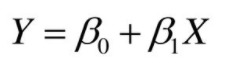

* Y is a response variable that is a linear function of the predictor variable
* β0: intercept; the value of Y when X=0
* β1: slope; how much Y changes when X increases by 1 unit

### References
https://online.stat.psu.edu/stat200/book/export/html/244

The aim of Bayesian Linear Regression is not to find the model parameters, but rather to find the ‘posterior‘ distribution for the model parameters. Not just the output y, but the model parameters are also assumed to come from a distribution. The expression for Posterior is :

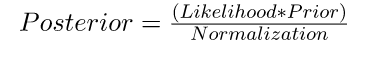

Where,
* Posterior: It is the probability of an event to occur; say, H, given that another event; say, E has already occurred. i.e., P(H | E).

* Prior: It is the probability of an event H has occurred prior to another event. i.e., P(H)

* Likelihood: It is a likelihood function in which some parameter variable is marginalized.

## References
https://www.geeksforgeeks.org/implementation-of-bayesian-regression/

This is actually equivalent to the Bayes Theorem which says,

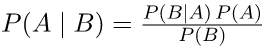

where A and B are events, 

* P(A) is the probability of event A occurring, also known as the prior probability.

* P(A|B) is the conditional probability of event A occurring, given that B is true. This is the posterior
probability due to its variable dependency on B. This assumes that event A is not independent of B.

* P(B|A) is the conditional probability of event B occurring given that A is true.

* P(B) is the probability of event B occurring.


## References
https://brunaw.com/phd/bayes-regression/report.pdf

## Model of Bayesian Regression
For Bayesian Linear regression we used model of Bayesian Ridge Regression Which is available in Scikit-learn

In [3]:
## Bayesian Ridge regression Model:-
#class sklearn.linear_model.BayesianRidge(*, n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, alpha_init=None, lambda_init=None, compute_score=False, fit_intercept=True, normalize=False, copy_X=True, verbose=False)   

### Parameters Description:-

> n_iter:Maximum number of iterations. Should be greater than or equal to 1.

> alpha_1 : shape parameter for the Gamma distribution prior over the alpha parameter.

> alpha_2 : inverse scale parameter (rate parameter) for the Gamma distribution prior over the alpha parameter.

> lambda_1 : shape parameter for the Gamma distribution prior over the lambda parameter.

> lambda_2 : inverse scale parameter (rate parameter) for the Gamma distribution prior over the lambda parameter.


 

## References
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html

## Advantages of Bayesian Linear regression
* By the Bayesian processing, you recover the whole range of inferential solutions, rather than a point estimate and a confidence interval as in classical regression. 

* We get a fully mathematically founded approach where you can easily incorporate prior knowledge about the problem domain.

* It works well when you have little data and will give you more than just the prediction.

## Disadvantages of Bayesian Linear regression
* It’s not great when you don’t have a regression problem, or if a linear model does not work well, or if you do not want a Bayesian approach.

* Finding a good prior can be hard and when you have a lot of data and only care about learning a single model instead of a distribution over models, we wi end up with essentially the same model as other types of linear regression. 

## Real World Application of Bayesian Linear Regression

* forecasting retail sales with the SAP Unified Demand Forecast (UDF).

* Biomedical research

## **Implementation Of Bayesian Regression**

### Importing Libraries

In [4]:
import warnings # To hide the warnings
import itertools # Library for efficient looping
import numpy as np # Scientific Calculations
import pandas as pd # Data Structures
import matplotlib.pyplot as plt # Visualizations
import seaborn as se # Visualizations
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split,cross_val_score # Train and Test Split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Scoring Metrics for Regression
warnings.filterwarnings('ignore')

### Dataset Description:-
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

They provide the data both in .ods and in .xlsx formats.

#### Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

### Dataset Source:-
https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

In [5]:
!wget 'https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/power.csv'

--2022-09-14 11:51:29--  https://raw.githubusercontent.com/profsarang/ThinkingDataScience/main/data/power.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 356371 (348K) [text/plain]
Saving to: ‘power.csv’

power.csv           100%[===================>] 348.02K  --.-KB/s    in 0.01s   

2022-09-14 11:51:29 (25.1 MB/s) - ‘power.csv’ saved [356371/356371]



### Data fetching
pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv('power.csv');#reading dataset from the specified location
df.head()#displaying initial entries

,Unnamed: 0,AT,V,AP,RH,PE
0,0,14.96,41.76,1024.07,73.17,463.26
1,1,25.18,62.96,1020.04,59.08,444.37
2,2,5.11,39.40,1012.16,92.14,488.56
3,3,20.86,57.32,1010.24,76.64,446.48
4,4,10.82,37.50,1009.23,96.62,473.90


In [7]:
#x_values
features=['AT','V','AP','RH']

In [8]:
#y_value
target='PE'

* Model Tuning Parameters

>alpha_1 : shape parameter for the Gamma distribution prior over the alpha parameter.

> alpha_2 : inverse scale parameter (rate parameter) for the Gamma distribution prior over the alpha parameter.

> lambda_1 : shape parameter for the Gamma distribution prior over the lambda parameter.

> lambda_2 : inverse scale parameter (rate parameter) for the Gamma distribution prior over the lambda parameter.

* Train and Test Ratio

> split_ratio -> This parameter specifies the splitting ratio for training and testing.

In [9]:
#parameters
Alpha1=0.00006138969568741323
Alpha2=12267443.02717635
Lambda1=5.936316029785909e-10
Lambda2=3075473.158359934

### Feature Selections
It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [10]:
X=df[features]
Y=df[target]

### Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [11]:
split_ratio=0.20
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=split_ratio,random_state=123)

### Model
Bayesian Regression can be very useful when we have insufficient data in the dataset or the data is poorly distributed. The output of a Bayesian Regression model is obtained from a probability distribution, as compared to regular regression techniques where the output is just obtained from a single value of each attribute. Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.

If there is a large amount of data available for our dataset, the Bayesian approach is not good for such cases.

In [12]:
model=BayesianRidge(alpha_1=Alpha1,alpha_2=Alpha2,lambda_1=Lambda1,lambda_2=Lambda2)
model.fit(x_train,y_train)

BayesianRidge(alpha_1=6.138969568741323e-05, alpha_2=12267443.02717635,
              lambda_1=5.936316029785909e-10, lambda_2=3075473.158359934)

Model Accuracy
We will use the trained model to make a prediction on the test set.Then use the predicted value for measuring the accuracy of our model.
> score: The score function returns the coefficient of determination R2 of the prediction.

In [13]:
y_pred=model.predict(x_test)
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 92.35 %



>r2_score: The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

>mae: The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

>mse: The mean squared error function squares the error(penalizes the model for large errors) by our model.

In [14]:
print("R2 Score: {:.2f} %".format(r2_score(y_test,y_pred)*100))
print("Mean Absolute Error {:.2f}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error {:.2f}".format(mean_squared_error(y_test,y_pred)))

R2 Score: 92.35 %
Mean Absolute Error 3.74
Mean Squared Error 22.13


## References

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html




### Prediction Plot
First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

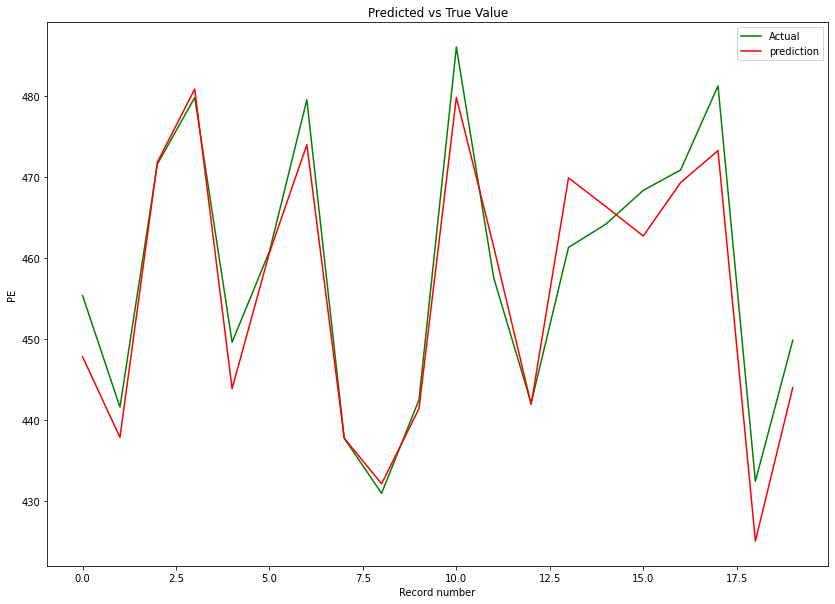

In [15]:
plt.figure(figsize=(14,10))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(x_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()